## Exploratory Data Analysis

### Contents:
* Load dataset
* Explore dataset
    * Check target balance
* Basic plots
* Outliers
* Handling missing values
    * Drop columns/row
    * Impute
* Treating categorical features

### Libraries:

In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

### Load Dataset:

In [2]:
path = "/Users/ballesta/repos/ML/gitHub/Templates_ML/data"

In [3]:
# Data from kaggle https://www.kaggle.com/sakshigoyal7/credit-card-customers
df = pd.read_csv(path+'/BankChurners.csv', sep = ',', header='infer', index_col=None)

In [4]:
columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns_to_drop, axis = 1) 

### Explore dataset

In [5]:
print('The size of the dataset is:', df.shape, '\n')
df.info()

The size of the dataset is: (10127, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Tota

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Get features and target

In [8]:
BOLD = '\033[1m'
END = '\033[0m'

In [9]:
model_features = df.columns.drop('Attrition_Flag')
model_target = 'Attrition_Flag'

print(BOLD,'Model features: \n', END,  model_features, '\n')
print(BOLD, 'Model target: \n', END, model_target)

 Model features: 
  Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 

 Model target: 
  Attrition_Flag


Get numerical and categorical features:

In [10]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print(BOLD, 'Numerical columns:\n', END, numerical_features_all, '\n')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print(BOLD, 'Categorical columns:\n', END, categorical_features_all)

 Numerical columns:
  Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object') 

 Categorical columns:
  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


Explore the unique values of the categorical features:

In [11]:
for c in categorical_features_all: 
    print(df[c].value_counts())

F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


Check value counts of the target to see possible imbalances.

In [12]:
df[model_target].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [13]:
majority_class = df[model_target].value_counts()[0]
minority_class = df[model_target].value_counts()[1]
print('Proportion of minority class:', round(minority_class/(minority_class+majority_class),3), '%')

Proportion of minority class: 0.161 %


In [14]:
#pandas_profiling.ProfileReport(df)

### Basic plots

Bar plot:

Attrition_Flag


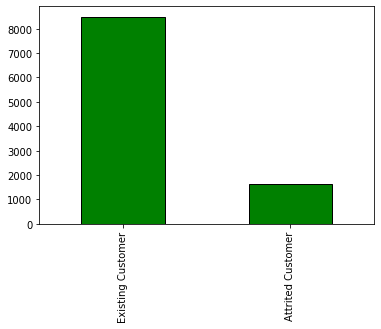

In [15]:
# Target
print(model_target)
df[model_target].value_counts().plot.bar(edgecolor = 'black', color = 'green')
plt.show()

# Categorical features
#for c in categorical_features_all:
#    if len(df[c].value_counts()) < 50:
#        print(c)
#        df[c].value_counts().plot.bar(edgecolor = 'black', color = 'green')
#        plt.show()

Histogram

In [16]:
# Numerical features
#for c in numerical_features_all:
#    df[c].plot.hist(bins=10, edgecolor = 'black', color = 'green')
#    plt.title(c)
#    plt.show()

### Outliers

Some outliers are detected by logic (for instance a sample with age 999) while other outliers follow different rules. A good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier. Another rule could be for example, removing any values in the upper 1%.

Check distribution of features with histograms as shown before.

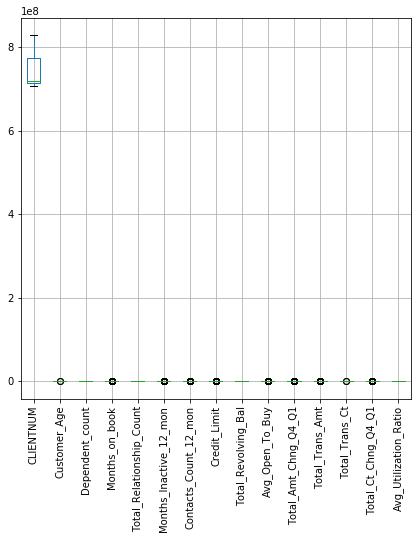

In [17]:
plt.figure(figsize=(7,7))
df.boxplot(rot=90)

In [18]:
for columns in numerical_features_all:
    first_quartile = df[columns].describe()['25%'] #Q1 = df[c].quantile(0.25)
    third_quartile = df[columns].describe()['75%'] #Q3 = df[c].quantile(0.75)

    iqr = third_quartile - first_quartile

    df = df[(df[columns] > (first_quartile - 3 * iqr)) &
                              (df[columns] < (third_quartile + 3 * iqr))]

Re-check distribution of the features

In [19]:
#plt.figure(figsize=(7,7))
#df.boxplot(rot=90)

### Correlations

Heat Map:

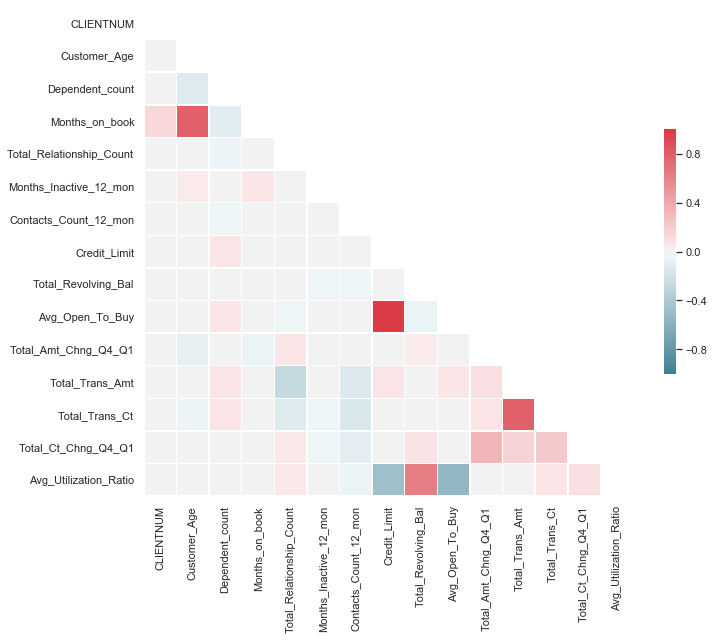

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.005784,0.010620,0.133573,0.004521,-0.008603,0.000652,0.010498,0.000204,0.010468,0.025563,-0.018263,0.003985,0.015150,-0.000116
Customer_Age,0.005784,1.000000,-0.132416,0.787701,-0.026178,0.046719,-0.021069,0.007208,0.016006,0.005716,-0.081284,-0.016633,-0.049813,-0.023894,0.002972
Dependent_count,0.010620,-0.132416,1.000000,-0.111273,-0.050297,-0.004296,-0.044773,0.069602,-0.005212,0.070009,-0.037239,0.076519,0.074050,0.013051,-0.038232
Months_on_book,0.133573,0.787701,-0.111273,1.000000,-0.019914,0.066848,-0.011036,0.010640,0.004701,0.010192,-0.061837,-0.018907,-0.038940,-0.021334,-0.011157
Total_Relationship_Count,0.004521,-0.026178,-0.050297,-0.019914,1.000000,-0.019466,0.038770,-0.036680,0.034898,-0.039877,0.066606,-0.270321,-0.129276,0.057470,0.048201
Months_Inactive_12_mon,-0.008603,0.046719,-0.004296,0.066848,-0.019466,1.000000,0.030610,-0.017725,-0.046323,-0.013408,-0.029431,-0.018264,-0.040068,-0.044880,-0.012696
Contacts_Count_12_mon,0.000652,-0.021069,-0.044773,-0.011036,0.038770,0.030610,1.000000,0.032389,-0.045480,0.036572,-0.013768,-0.140019,-0.153669,-0.095925,-0.058508
Credit_Limit,0.010498,0.007208,0.069602,0.010640,-0.036680,-0.017725,0.032389,1.000000,0.034555,0.995694,0.009129,0.070327,-0.016113,-0.026954,-0.474206
Total_Revolving_Bal,0.000204,0.016006,-0.005212,0.004701,0.034898,-0.046323,-0.045480,0.034555,1.000000,-0.058243,0.042821,0.014329,0.028955,0.085855,0.639021
Avg_Open_To_Buy,0.010468,0.005716,0.070009,0.010192,-0.039877,-0.013408,0.036572,0.995694,-0.058243,1.000000,0.005147,0.068920,-0.018781,-0.034888,-0.532959


We need to get the columns with an absolute correlation value high for our problem (in this case we set it to 0.8).

In [22]:
indices = np.where((corr > 0.8) | (corr < -0.8))
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('Credit_Limit', 'Avg_Open_To_Buy')]

Drop one of the two correlated columns:

In [23]:
df = df.drop('Avg_Open_To_Buy', axis = 1)
numerical_features_all = numerical_features_all.drop('Avg_Open_To_Buy')
model_features = model_features.drop('Avg_Open_To_Buy')

### Missing values:

Let's check the number of missing (nan) values for each column.

In [24]:
# Replace 'Unknown' by missing value
for c in categorical_features_all:
    df[c] = df[c].replace('Unknown',np.nan)

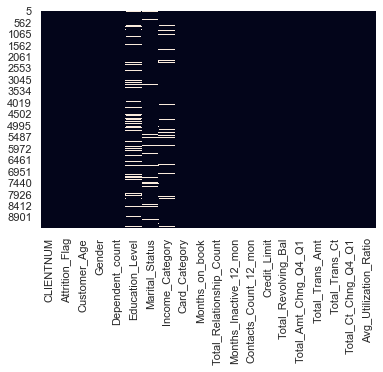

In [25]:
sns.heatmap(df.isnull(), cbar=False)

In [26]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing = missing_values_table(df)
missing

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Education_Level,1357,15.0
Income_Category,1014,11.2
Marital_Status,668,7.4


With missing values we can:
    * Impute (with mean, constant value, majority value or ML imputation)
    * Drop row/column
    
The best option depends on the problem faced.
In the following commented code, you will see a simple sample on how to perform the options just mentioned. Be aware of checking the parameters of the methods to get more options.

In [27]:
# If you want to impute by a constant
# df[c] = df[c].replace(np.nan, X) # where c is the column name and X is the constant

# If you want to impute by the mean
# df = df[c].fillna(df[c].mean()) # where c is the column name

# If you want to impute by the majority value
# df = df[c].fillna(df[c].mode()) # where c is the column name


# Drop row
# df = df.dropna()

# Drop column
# df = df.dropna(axis = 1)

# ML imputation

To keep with the example, we will use https://github.com/awslabs/datawig as example of ML imputation for categorical features:

[As a reminder, there are many other ML imputation methods and to choose the best one, there are available some evaluation metrics. But the model evaluation is not the objective of this dummy template].

In [76]:
import datawig

# Columns to impute and columns used for training
columns_to_impute = list(missing.index)
columns_to_train = model_features.drop(columns_to_impute)

imputed = df
for c in columns_to_impute:
    
    # Prepare train, validation and test set
    df_train = imputed.dropna(subset=[c])

    mask = imputed[c].isnull()
    df_test = imputed[mask]

    # Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=columns_to_train, # column(s) containing information about the column we want to impute
        output_column=c, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    # Fit an imputer model on the train data
    imputer.fit(train_df=df_train)

    # Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test) # Check on probability
    imputed = df_train.append(imputed)

In [77]:
# Review probaibilities (we'll get the prediction of those with high probabilities)
(imputed[[s + '_imputed_proba' for s in columns_to_impute]]).describe()

,Education_Level_imputed_proba,Income_Category_imputed_proba,Marital_Status_imputed_proba
count,1357.000000,1014.000000,668.000000
mean,0.392549,0.682019,0.519225
std,0.045553,0.129597,0.076871
min,0.273601,0.251872,0.391431
25%,0.362465,0.607210,0.463962
50%,0.387159,0.707307,0.500668
75%,0.419658,0.772887,0.555238
max,0.712784,0.966756,0.878575


In [81]:
# Replace the missing values with the predicted values for those cases with a probability higher than 70%
for c in columns_to_impute:
    imputed[c] = np.where(imputed[c+'_imputed_proba'] > 0.7,
                          imputed[c+'_imputed'], imputed[c])
    
# Drop columns no longer needed
imputed = imputed.drop([s + '_imputed_proba' for s in columns_to_impute], axis = 1) # remove proobabilities columns
imputed = imputed.drop([s + '_imputed' for s in columns_to_impute], axis = 1)

In [84]:
# Check how the missing values are after the imputation with the most probable predictions
missing_values_table(imputed)

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Education_Level,1356,14.9
Marital_Status,639,7.0
Income_Category,480,5.3


In [85]:
# We will imput the remaining missing values with a constant '-1'
for c in columns_to_impute:
    imputed[c] = imputed[c].replace(np.nan, -1)

In [86]:
# We can see there are no missing values on our dataset
missing_values_table(imputed)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### One hot encoding

In [87]:
#One hot encode for categorical variables
encode_cat = pd.get_dummies(imputed[categorical_features_all], drop_first=True) # Note that we remove one of the categories

encode_cat = pd.concat([encode_cat, imputed], axis = 1)
df_final = encode_cat.drop(list((imputed[categorical_features_all]).columns), axis=1)
df_final.shape

(9072, 33)

In [91]:
# Convert target column for being 1 attrited and 0 existing
df_final['Attrition_Flag'] = df_final['Attrition_Flag'].replace('Existing Customer',0)
df_final['Attrition_Flag'] = df_final['Attrition_Flag'].replace('Attrited Customer',1)

#### Save Data:

In [92]:
df_final.to_csv(path+'/df_eda.csv')